<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
C:\Users\adity\AppData\Local\Temp\ipykernel_17060\1239750396.py:15: SyntaxWarning: invalid escape sequence '\l'
  axs[0].plot(thickness, lambda_7, 'd-', color='forestgreen', linewidth=2, label='Measured $\lambda_7$')
C:\Users\adity\AppData\Local\Temp\ipykernel_17060\1239750396.py:19: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_ylabel('$\lambda_7$ Magnitude')
C:\Users\adity\AppData\Local\Temp\ipykernel_17060\1239750396.py:25: SyntaxWarning: invalid escape sequence '\l'
  axs[1].loglog(thickness, lambda_7, 'd-', color='forestgreen', linewidth=2, label='Measured $\lambda_7$')

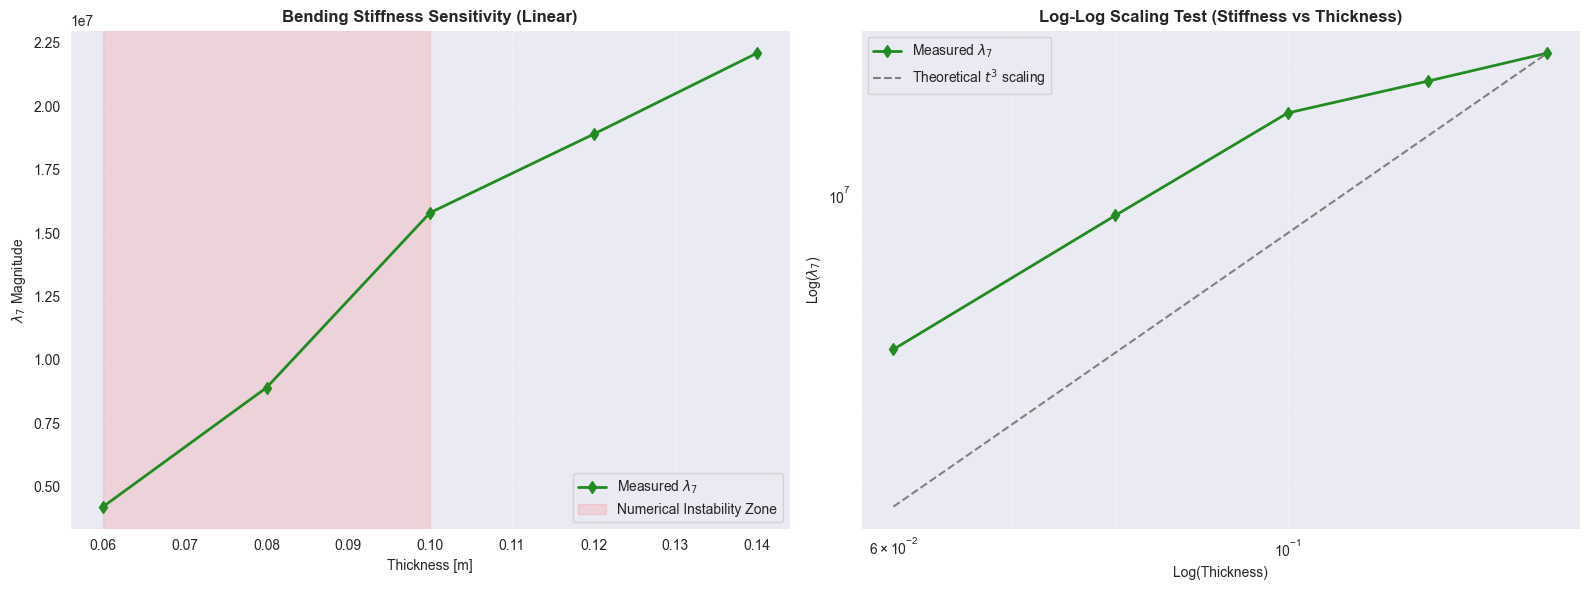

Calculated scaling power (t^n) for stable region: n = 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your results
thickness = np.array([0.06, 0.08, 0.10, 0.12, 0.14])
trace_values = np.array([1.2025e+13, 1.1623e+13, 1.1977e+13, 1.2709e+13, 1.3657e+13])
cond_numbers = np.array([5.2306e+04, 1.8690e+04, 8.9056e+03, 8.6391e+03, 8.5083e+03])
# Extracted from your previous plot image
lambda_7 = np.array([0.42e7, 0.89e7, 1.58e7, 1.89e7, 2.21e7])

# Create a more analytical visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: The "Weird" Linear Scale (to see the inflection)
axs[0].plot(thickness, lambda_7, 'd-', color='forestgreen', linewidth=2, label='Measured $\lambda_7$')
axs[0].axvspan(0.06, 0.10, color='red', alpha=0.1, label='Numerical Instability Zone')
axs[0].set_title('Bending Stiffness Sensitivity (Linear)', fontweight='bold')
axs[0].set_xlabel('Thickness [m]')
axs[0].set_ylabel('$\lambda_7$ Magnitude')
axs[0].legend()
axs[0].grid(True, alpha=0.2)

# Plot 2: The Log-Log "Physics Test"
# If Stiffness ~ t^3, this should be a straight line
axs[1].loglog(thickness, lambda_7, 'd-', color='forestgreen', linewidth=2, label='Measured $\lambda_7$')

# Theoretical t^3 line for comparison (normalized to the last point)
theoretical_t3 = (thickness**3) * (lambda_7[-1] / thickness[-1]**3)
axs[1].loglog(thickness, theoretical_t3, '--', color='gray', label='Theoretical $t^3$ scaling')

axs[1].set_title('Log-Log Scaling Test (Stiffness vs Thickness)', fontweight='bold')
axs[1].set_xlabel('Log(Thickness)')
axs[1].set_ylabel('Log($\lambda_7$)')
axs[1].legend()
axs[1].grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

# Quick Slope Calculation (The "Feature" for Phase 4 Decision Tree)
slope = np.polyfit(np.log(thickness[2:]), np.log(lambda_7[2:]), 1)[0]
print(f"Calculated scaling power (t^n) for stable region: n = {slope:.2f}")